In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

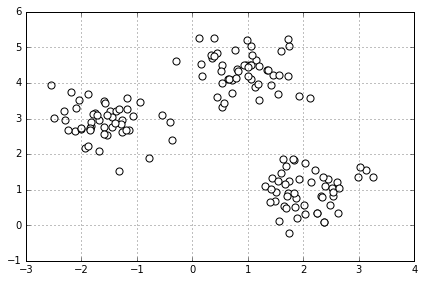

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()

In [6]:
from sklearn.cluster import KMeans


In [7]:
km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

In [8]:
y_km

array([1, 3, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 1, 3,
       2, 0, 1, 1, 3, 0, 4, 0, 0, 0, 0, 2, 4, 1, 4, 3, 2, 0, 0, 2, 1, 4, 1,
       0, 3, 0, 3, 4, 2, 2, 1, 1, 0, 3, 1, 0, 3, 0, 0, 0, 0, 3, 0, 2, 4, 2,
       2, 3, 4, 1, 2, 4, 2, 3, 0, 0, 2, 4, 1, 3, 2, 4, 1, 1, 0, 0, 1, 1, 3,
       4, 2, 4, 3, 0, 0, 4, 4, 4, 1, 0, 1, 4, 2, 0, 3, 2, 2, 0, 3, 4, 0, 2,
       0, 2, 3, 0, 0, 3, 1, 2, 2, 4, 4, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0,
       4, 0, 3, 3, 1, 1, 0, 0, 0, 0, 1, 1])

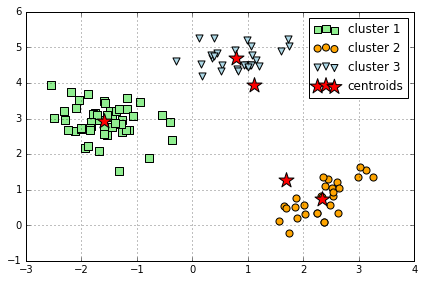

In [9]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [10]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 55.24


## Using the elbow method to find the optimal number of clusters

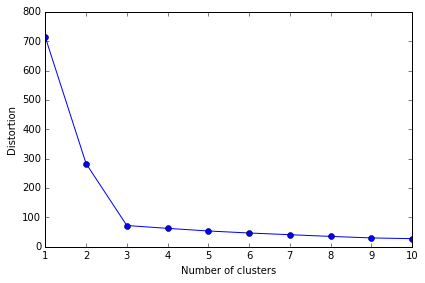

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

## Quantifying the quality of clustering via silhouette plots

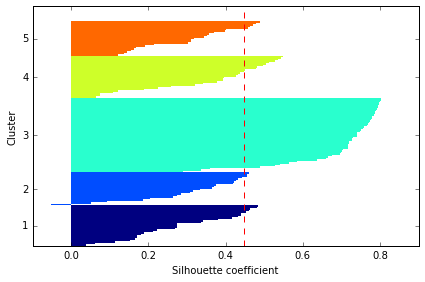

In [17]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=5, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [18]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 53.87
